In [1]:
from warnings import simplefilter
simplefilter("ignore", category=FutureWarning) 
simplefilter("ignore", category=UserWarning)
import sys
if '/home/rossco/immunova' not in sys.path:
    sys.path.append('/home/rossco/immunova')
from immunova.data.mongo_setup import pd_init
from immunova.data.fcs_experiments import FCSExperiment
from immunova.flow.gating.actions import Gating, Template
from immunova.flow.gating.defaults import ChildPopulationCollection
from tqdm import tqdm_notebook
import matplotlib
import pandas as pd
import os
pd_init()

In [2]:
texp = FCSExperiment.objects(experiment_id='PD_T_PDMCs').get()

In [3]:
t = Template(texp, '142-09_pdmc_t', include_controls=False)

In [4]:
t.load_template('PBMCt_Preprocessing')

True

Applying boundary...
------ boundary ------
New population: cells
...proportion of total events: 0.192
...proportion of parent: 0.192
New population: debris
...proportion of total events: 0.808
...proportion of parent: 0.808
-----------------------
Applying CD3_gate...
------ CD3_gate ------
New population: CD3+
...proportion of total events: 0.010
...proportion of parent: 0.051
New population: CD3-
...proportion of total events: 0.182
...proportion of parent: 0.949
-----------------------
Applying live_gate...
------ live_gate ------
New population: dead
...proportion of total events: 0.001
...proportion of parent: 0.087
New population: live
...proportion of total events: 0.009
...proportion of parent: 0.913
-----------------------
Applying singlets1_gate...
------ singlets1_gate ------
New population: singlets1
...proportion of total events: 0.009
...proportion of parent: 0.997
New population: doublets1
...proportion of total events: 0.000
...proportion of parent: 0.003
-------------

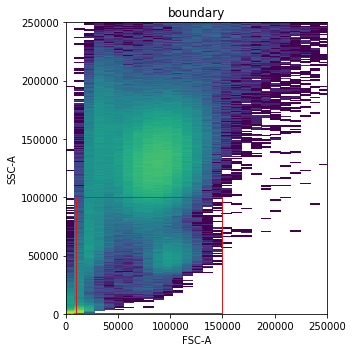

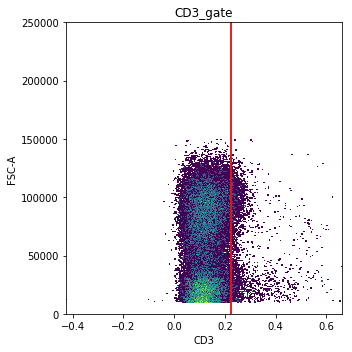

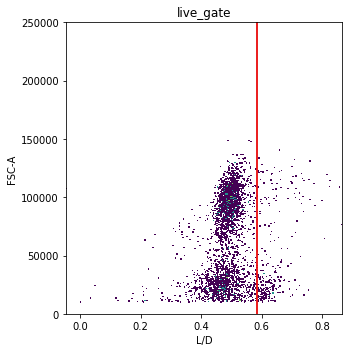

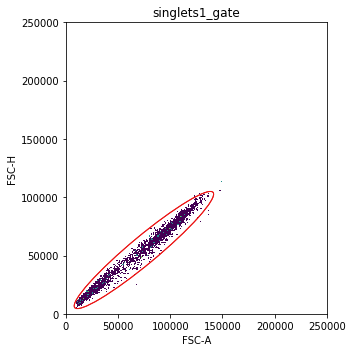

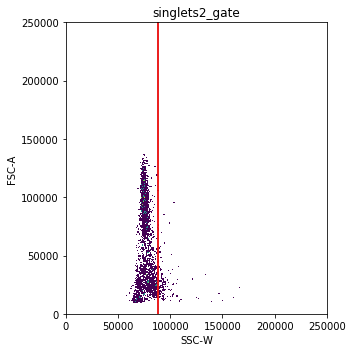

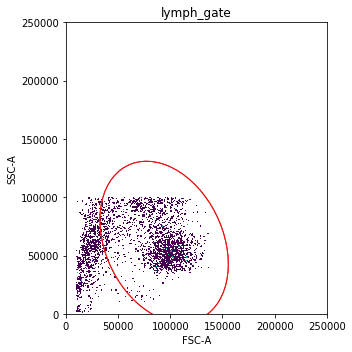

In [5]:
t.apply_many(apply_all=True, plot_outcome=True)

In [6]:
t.save(overwrite=True)

Saved successfully!


True

In [7]:
f = texp.pull_sample('142-09_pdmc_t')
f.flags = 'invalid'
f.save()

<FileGroup: FileGroup object>